## Machine Learning Model Lasso L1 and Ridge L2

# Importing the Libraries

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Importing the Dataset

In [67]:
dataset = pd.read_excel('./Real estate valuation data set.xlsx')
dataset.head()
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# Splitting the Dataset into the Training Set and Test Set

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Training the Simple L1 Regression model on the Training set

---



In [69]:
from sklearn import linear_model
L1 = linear_model.Lasso()
L1.fit(X_train,y_train)

Lasso()

# Training the Simple L2 Regression Model on the Training Set



In [70]:
L2 = linear_model.Ridge()
L2.fit(X_train, y_train)

Ridge()

# Predicting the Test Set Results

In [71]:
y1_pred = L1.predict(X_test)
y2_pred = L2.predict(X_test)

In [72]:
print(str.format("X size: {0}, Y size: {1}", len(X_train), len(y_train)))

X size: 276, Y size: 276


# Visualising the Training Set Results

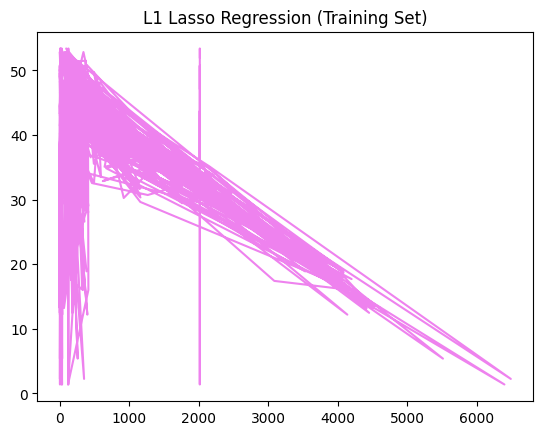

In [73]:
#I think we need to do a coplot or 3d scatter plot for this
#https://web.archive.org/web/20130808154531/http://answers.oreilly.com/topic/2428-when-and-how-to-use-conditional-plots-co-plots-for-data-analysis/
#plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, L1.predict(X_train), color = 'violet')
plt.title('L1 Lasso Regression (Training Set)')
plt.show()

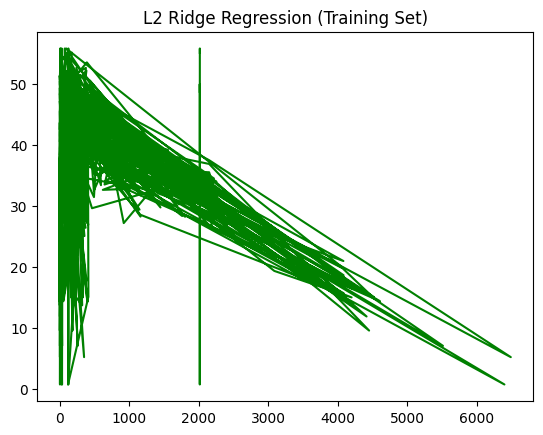

In [74]:
# plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, L2.predict(X_train), color = 'green')
plt.title('L2 Ridge Regression (Training Set)')
plt.show()

# Visualizing the Test Set Results

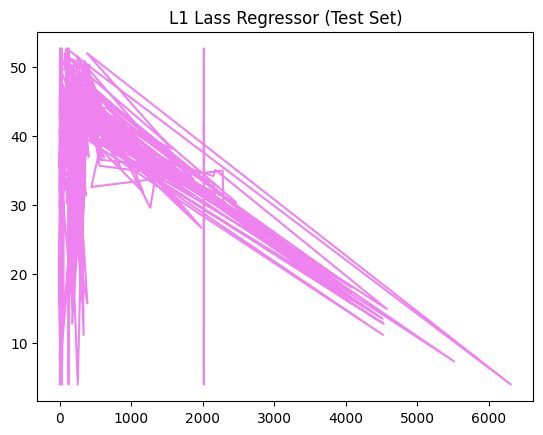

In [75]:
# plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, L1.predict(X_test), color = 'violet')
plt.title('L1 Lass Regressor (Test Set)')
plt.show()

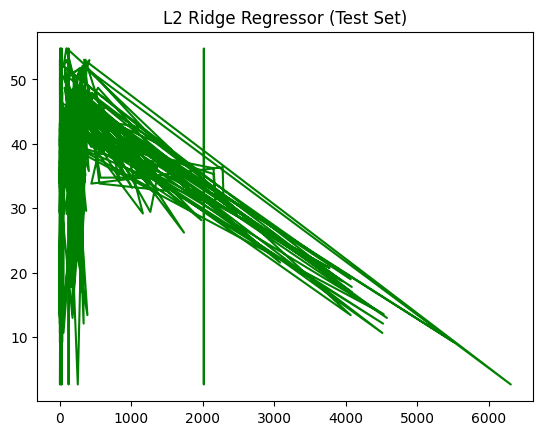

In [76]:
# plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, L2.predict(X_test), color = 'green')
plt.title('L2 Ridge Regressor (Test Set)')
plt.show()

## Compare Performance Metrics of L1 and L2

# Mean Absolute Error (MAE)

In [77]:
print('L1_MAE: ', mean_absolute_error(y_test, y1_pred))
print('L2_MAE: ', mean_absolute_error(y_test, y2_pred))

L1_MAE:  6.322821113396978
L2_MAE:  6.251475828633717


# Mean Squared Error (MSE)

In [78]:
print('L1_MSE: ', mean_squared_error(y_test, y1_pred))
print('L2_MSE: ', mean_squared_error(y_test, y2_pred))

L1_MSE:  76.340371718792
L2_MSE:  72.66421105011


# Root Mean Squared Error (RMSE)

In [79]:
print('L1_RMSE: ', mean_squared_error(y_test, y1_pred, squared=False))
print('L2_RMSE: ', mean_squared_error(y_test, y2_pred, squared=False))

L1_RMSE:  8.737297735501063
L2_RMSE:  8.524330533837247


# R-Squared

In [80]:
L1_r2 = r2_score(y_test, y1_pred)
L2_r2 = r2_score(y_test, y2_pred)

print('L1_r2: ', L1_r2)
print('L2_r2: ', L2_r2)

L1_r2:  0.544277280593479
L2_r2:  0.5662225488596364


# Adjusted R-Squared

In [81]:
print('L1_adj_r2: ', (1 - (1-L1_r2)*(len(y)-1)/(len(y) - X.shape[1] - 1)))
print('L2_adj_r2: ', (1 - (1-L2_r2)*(len(y)-1)/(len(y) - X.shape[1] - 1)))

L1_adj_r2:  0.5364199923278494
L2_adj_r2:  0.5587436272882509
